# Import Libraries

In [36]:
import tensorflow as tf 
from keras.layers import *
from keras.preprocessing import image
from keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

# Load DataSet

In [37]:
train_path = '/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/train'
test_path = '/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/test'
val_path = '/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val'

In [38]:
image_classes = os.listdir(train_path)
print(image_classes)

['healthy_guava', 'fruit_fly', 'Anthracnose']


# Visualization 

In [39]:
def plot_image(image_classes):
    plt.figure(figsize=(14 , 14))
    
    for i , category in enumerate(image_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image 
        
        img= image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4 , 4 , i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

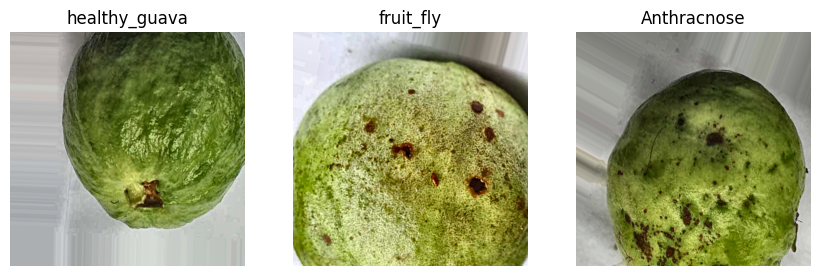

In [40]:
plot_image(image_classes)

# Preprocessing 

In [41]:
image_generator = ImageDataGenerator(rescale = 1/255)

In [42]:
train_data = image_generator.flow_from_directory(train_path ,
                                                batch_size = 32,
                                                target_size = (224 , 224),
                                                class_mode='categorical')

Found 2647 images belonging to 3 classes.


In [43]:
test_data = image_generator.flow_from_directory(test_path ,
                                                batch_size = 32,
                                                target_size = (224 , 224),
                                                class_mode='categorical')

Found 382 images belonging to 3 classes.


In [44]:
val_data = image_generator.flow_from_directory(val_path ,
                                                batch_size = 32,
                                                target_size = (224 , 224),
                                                class_mode='categorical')

Found 755 images belonging to 3 classes.


In [45]:
model = Sequential()
#add conv layer
model.add(Conv2D(filters=32 , kernel_size=3 , padding = 'same' ,
                 activation ='relu' , input_shape=[224 , 224 , 3] ))
#add pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))
#add conv layer
model.add(Conv2D(filters=64 , kernel_size=3 , padding = 'same' ,
                 activation ='relu'))
#add pooling layer 
model.add(MaxPooling2D())
#add Flatten 
model.add(Flatten())
#fully connected layer 
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(128 , activation = 'relu'))
#add output layer 
model.add(Dense(3 , activation='softmax'))



In [46]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,726,531 (98.14 MB)

 Trainable params: 25,726,531 (98.14 MB)

 Non-trainable params: 0 (0.00 B)

# Compile Model

In [47]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

# Fit Model

In [48]:
model_history = model.fit(train_data , epochs = 5 , validation_data = val_data)

Epoch 1/5


I0000 00:00:1732275599.475995     936 service.cc:145] XLA service 0x783a90002810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732275599.476097     936 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 2/83 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.4141 - loss: 3.9501  

I0000 00:00:1732275605.295639     936 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


83/83 ━━━━━━━━━━━━━━━━━━━━ 54s 524ms/step - accuracy: 0.5669 - loss: 1.8174 - val_accuracy: 0.8636 - val_loss: 0.3849
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 323ms/step - accuracy: 0.8810 - loss: 0.3022 - val_accuracy: 0.9166 - val_loss: 0.1939
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 323ms/step - accuracy: 0.9567 - loss: 0.1238 - val_accuracy: 0.9232 - val_loss: 0.1736
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 323ms/step - accuracy: 0.9706 - loss: 0.0776 - val_accuracy: 0.8821 - val_loss: 0.3463
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 331ms/step - accuracy: 0.9841 - loss: 0.0494 - val_accuracy: 0.9325 - val_loss: 0.2261


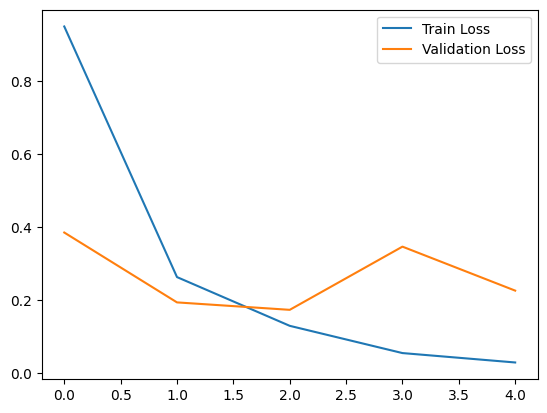

In [49]:
plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

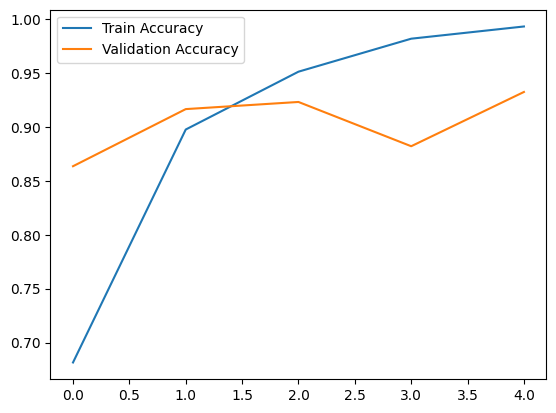

In [50]:
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [51]:
model.evaluate(train_data)

83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 262ms/step - accuracy: 0.9980 - loss: 0.0078


[0.007347750943154097, 0.9984888434410095]

In [52]:
model.evaluate(test_data)

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 604ms/step - accuracy: 0.9164 - loss: 0.2847


[0.2358483523130417, 0.9240837693214417]